In [2]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append("../utils")

from construct_model import *
from text_pre_processor import *

%aimport construct_model
%aimport text_pre_processor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
with open('../data/interim/text_target.pkl', 'rb') as f:
    text_target = pickle.load(f)
    
X = text_target.cleaned_text
y = text_target.target

In [18]:
vec = TfidfVectorizer()
lr = LogisticRegression(random_state=42)

lr_model = ConstructModel([vec, lr], X, y)

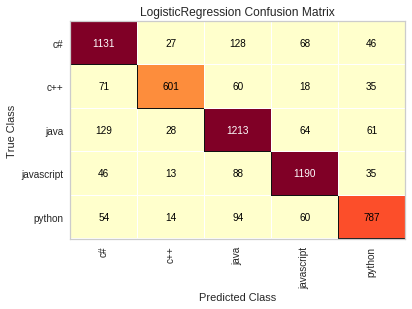

In [14]:
lr_model.get_confusion_matrix("test")

In [23]:
tpp = TextPreProcessor()
processed_text = tpp.process_text("This is some text")

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer()

lr_model.get_prediction(
    "Here is some text I would like to predict. This is about python. What if I say something like div", 
    format="proba")

[('c#', 0.09340867423121758),
 ('c++', 0.04708538654887668),
 ('java', 0.08698293702583987),
 ('javascript', 0.5742811403193386),
 ('python', 0.1982418618747272)]

In [47]:
lr_model.pipe.classes_


array(['c#', 'c++', 'java', 'javascript', 'python'], dtype=object)